https://github.com/NextBrain-ai/nbsynthetic

https://ydata.ai/resources/top-5-packages-python-synthetic-data

https://github.com/sdv-dev/SDV?tab=readme-ov-file

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def generate_distribution(shape, n_points, ndim_extra=0, random_state=2024):
    """
    Generate a specific distribution based on the shape parameter and optionally add extra dimensions.

    Parameters:
    shape (str): The type of distribution to generate ('wave', 'square', 'diamond', 'semi_circle', 'butterfly', 'circle', 'clusters').
    n_points (int): The number of points to generate.
    ndim_extra (int): Number of additional i.i.d. uniformly distributed dimensions to add (default: 0).

    Returns:
    np.ndarray: A 2D array where each row is a point, with extra dimensions added if specified.
    """
    
    # Set the random seed if provided
    if random_state is not None:
        np.random.seed(random_state)
    
    if shape == 'wave':
        x = np.linspace(-1, 1, n_points)
        y = 0.7 * np.sin(3 * np.pi * x) + np.random.normal(0, 0.4, n_points)
    elif shape == 'square':
        x = np.random.uniform(-1, 1, n_points)
        y = np.random.uniform(-1, 1, n_points)
    elif shape == 'diamond':
        angle = np.pi / 4  # 45 degrees
        x = np.random.uniform(-1, 1, n_points)
        y = np.random.uniform(-1, 1, n_points)  # Diamond shape
        x, y = (
            x * np.cos(angle) - y * np.sin(angle),
            x * np.sin(angle) + y * np.cos(angle)
        )  # Rotate the diamond
    elif shape == 'semi_circle':
        x = np.linspace(-1, 1, n_points)
        y = 0.7 * np.sqrt(1 - x**2) + np.random.normal(0, 0.2, n_points)  # Semi-circle
    elif shape == 'butterfly':
        x = np.random.uniform(-1, 1, n_points)
        y = 0.9 * x**2 * np.random.choice([-1, 1], n_points) + np.random.normal(0, 0.2, n_points)
    elif shape == 'circle':
        angles = np.random.uniform(0, 2 * np.pi, n_points)
        radii = np.random.uniform(0.6, 1.1, n_points)  # Add thickness to the circle
        x = radii * np.cos(angles)
        y = radii * np.sin(angles)
    elif shape == 'clusters':
        x = np.concatenate([
            np.random.normal(-0.7, 0.2, n_points // 4),
            np.random.normal(0.7, 0.2, n_points // 4),
            np.random.normal(-0.7, 0.2, n_points // 4),
            np.random.normal(0.7, 0.2, n_points // 4)
        ])
        y = np.concatenate([
            np.random.normal(-0.7, 0.2, n_points // 4),
            np.random.normal(-0.7, 0.2, n_points // 4),
            np.random.normal(0.7, 0.2, n_points // 4),
            np.random.normal(0.7, 0.2, n_points // 4)
        ])
    else:
        raise ValueError(f"Shape '{shape}' not recognized. Choose from 'wave', 'square', 'diamond', 'semi_circle', 'butterfly', 'circle', 'clusters'.")

    # Combine x and y into a 2D array
    data = np.column_stack((x, y))

    # Add extra dimensions if specified
    if ndim_extra > 0:
        extra_dims = np.random.uniform(-1, 1, (n_points, ndim_extra))  # Uniformly distributed extra dimensions
        data = np.hstack((data, extra_dims))

    return data


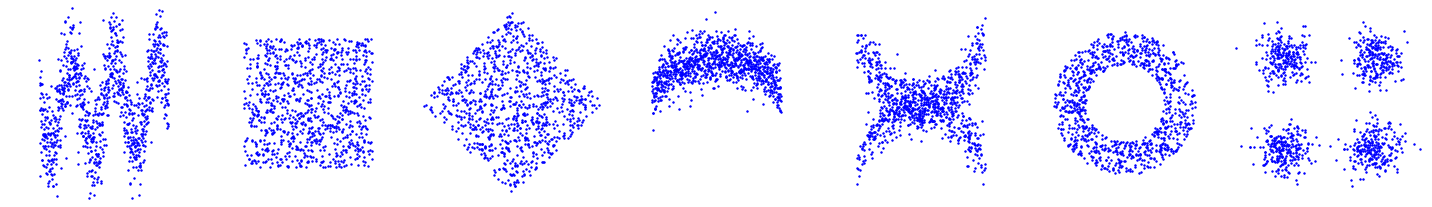

In [79]:
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
shapes = ['wave', 'square', 'diamond', 'semi_circle', 'butterfly', 'circle', 'clusters']

for i, shape in enumerate(shapes):
    data = generate_distribution(shape, 1000, ndim_extra=0)  # Generate 2D array with 2 extra dimensions
    axes[i].scatter(data[:, 0], data[:, 1], s=2, color='blue')  # Use first column as x, second as y
    axes[i].set_xlim(-1.5, 1.5)
    axes[i].set_ylim(-1.5, 1.5)
    axes[i].set_aspect('equal', 'box')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [81]:
import matplotlib.pyplot as plt
from typing import List, Type
from prelim.generators.base_generator import BaseGenerator

def visualize_generated_data(ndim_extra_values: List[int], generator_class: Type[BaseGenerator], 
                             n_samples: int=10000, random_state: int=2025, distribution_type: str='clusters') -> None:
    """
    Visualize original and generated data for different ndim_extra values.
    
    Parameters:
        ndim_extra_values (list): List of extra dimensions to add to the data.
        n_samples (int): Number of samples to generate using the generator.
        random_state (int): Random state for reproducibility.
        distribution_type (str): Type of distribution to generate (e.g., 'clusters').
        generator_class (class): Generator class to use for sampling (e.g., GenAdasyn).
    """
    for ndim_extra in ndim_extra_values:
        # Generate original data
        X = generate_distribution(distribution_type, 100, ndim_extra=ndim_extra, random_state=random_state)
        
        # Use the specified generator
        generator = generator_class()
        generator.fit(X)
        df = generator.sample(n_samples=n_samples)
        
        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(7, 4), sharex=True, sharey=True)
        
        # Plot the original data
        axes[0].scatter(X[:, 0], X[:, 1], color='blue', alpha=0.6, s=20)
        axes[0].set_title("Original Data", fontsize=14)
        axes[0].set_xlabel("X-axis", fontsize=10)
        axes[0].set_ylabel("Y-axis", fontsize=10)
        axes[0].grid(True, linestyle='--', alpha=0.5)
        
        # Plot the generated data
        axes[1].scatter(df[:, 0], df[:, 1], color='orange', alpha=0.6, s=20)
        axes[1].set_title(f"Generated Data ({generator.my_name()})", fontsize=14)
        axes[1].set_xlabel("X-axis", fontsize=10)
        axes[1].grid(True, linestyle='--', alpha=0.5)
        
        # Adjust layout and set axis limits
        fig.suptitle(f"Original vs. Generated Data (ndim_extra={ndim_extra})", fontsize=16)
        plt.xlim(-1.5, 1.5)
        plt.ylim(-1.5, 1.5)
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
        
        # Show the plot
        plt.show()

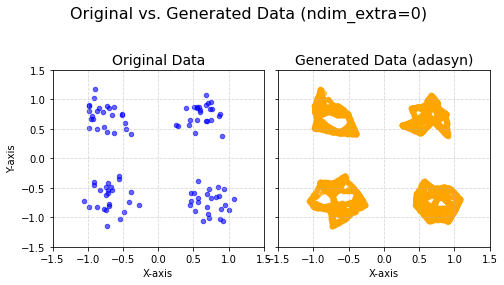

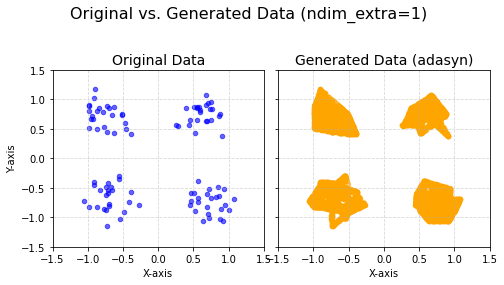

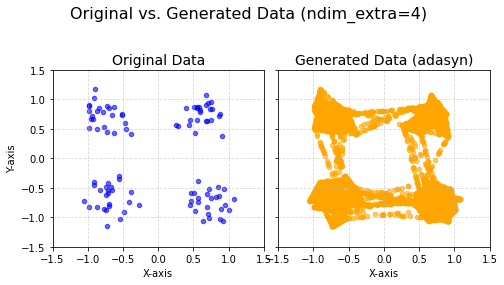

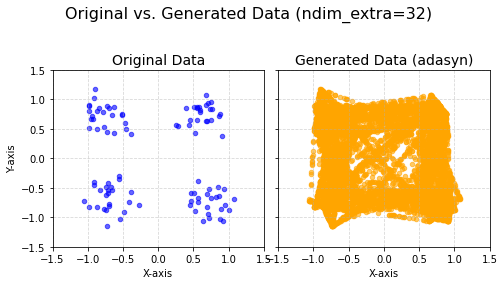

In [82]:
from prelim.generators.adasyn import GenAdasyn

ndim_extra_values = [0, 1, 4, 32]
n_samples = 10000
random_state = 2025
distribution_type = 'clusters'

visualize_generated_data(
    ndim_extra_values=ndim_extra_values,
    n_samples=n_samples,
    random_state=random_state,
    distribution_type=distribution_type,
    generator_class=GenAdasyn
)


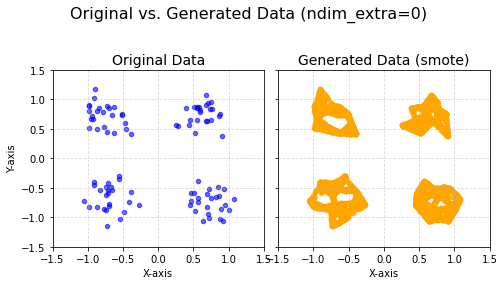

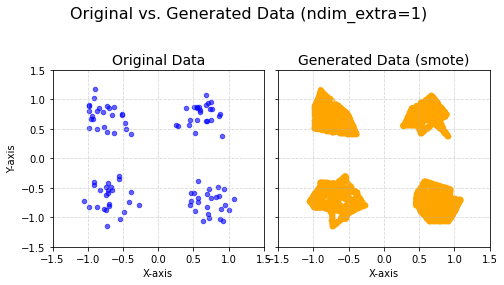

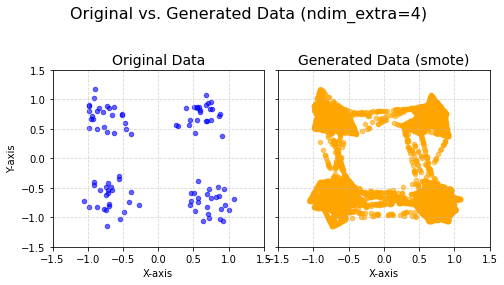

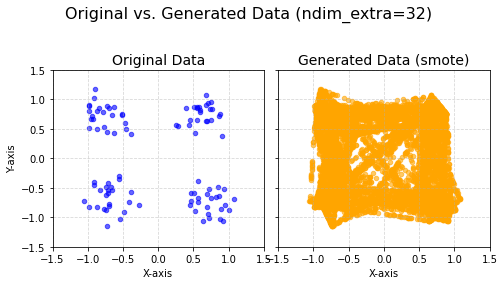

In [83]:
from prelim.generators.smote import GenSmote

ndim_extra_values = [0, 1, 4, 32]
n_samples = 10000
random_state = 2025
distribution_type = 'clusters'

visualize_generated_data(
    ndim_extra_values=ndim_extra_values,
    n_samples=n_samples,
    random_state=random_state,
    distribution_type=distribution_type,
    generator_class=GenSmote
)

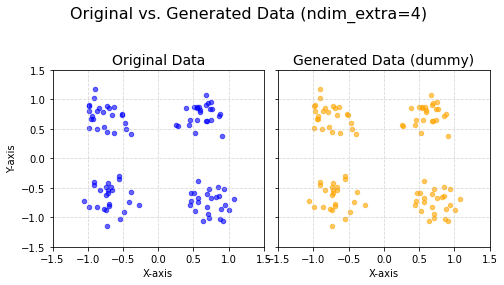

In [84]:
from prelim.generators.dummy import GenDummy

ndim_extra_values = [4]
n_samples = 10000
random_state = 2025
distribution_type = 'clusters'

visualize_generated_data(
    ndim_extra_values=ndim_extra_values,
    n_samples=n_samples,
    random_state=random_state,
    distribution_type=distribution_type,
    generator_class=GenDummy
)